**RIDGE REGRESSION**

source : https://www.andreaperlato.com/theorypost/ridge-and-lasso-regression/

IMPORTING THE LIBRARIES:

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

IMPORTING THE DATASET

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

SPLITTING DATASET:

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

DEFINING MODEL EVALUATION METHOD:

In [4]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

DEFINING THE MODEL

In [6]:
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(X_train, y_train)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_absolute_error', store_cv_values=False)

PREDICTING RESULTS

In [9]:
print(model.predict([[3.2]]))

[56832.88559874]


In [10]:
y_pred = model.predict(X_test)

Performance Evaluation


In [16]:
rmse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)
print("Slope : " , model.coef_)
print("Intercept : " , model.intercept_)
print("RMSE : " , rmse)
print("R2 score : " , r2)

Slope :  [9274.2577786]
Intercept :  27155.26070720218
RMSE :  21315540.995205376
R2 score :  0.9745700560587587


Visualisation

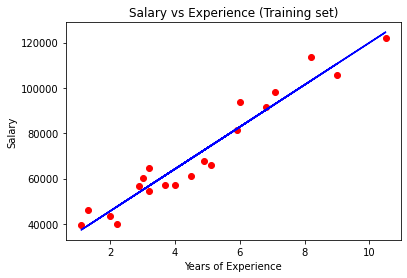

In [12]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

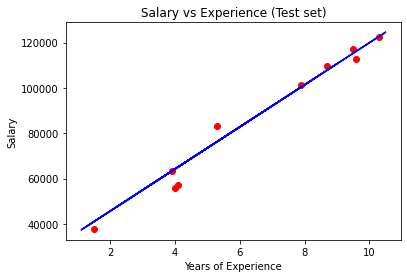

In [13]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()